# BASELINE PREREQUISITES

### IMPORT LIBRARIES

In [1]:
import os
from tensorflow.keras.preprocessing.image import DirectoryIterator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### DEFINITIONS

#### GET DATA FROM TRAIN DATASET

In [2]:
def get_data(val_split = False, test_size = 0.3):
    '''This function returns the '''
    path = '../catchafish/data'
    batch_size = 100000
    
    dir_iterator = DirectoryIterator(directory = path, 
                                     image_data_generator = None, 
                                     target_size = (32, 32), 
                                     batch_size = batch_size,
                                     shuffle = True, 
                                     dtype = int)
    
    X = dir_iterator[0][0]
    y = dir_iterator.labels
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    if val_split:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        return X_train, X_test, y_train, y_test

#### GET DATA FROM TEST DATASET

In [3]:
def get_data_test():
    '''This function returns the '''
    path = '../catchafish/data_test'
    batch_size = 1000
    
    dir_iterator = DirectoryIterator(directory = path, 
                                     image_data_generator = None, 
                                     target_size = (32, 32), 
                                     batch_size = batch_size,
                                     shuffle = False, 
                                     dtype = int)
    
    X_test = dir_iterator[0][0]
    y_test = dir_iterator.labels
    return X_test, y_test

# BASELINE MODEL SETTINGS AND TRAINING

### SAMPLE DEFINITION TO APLLY TO AN ARRAY

In [66]:
def defini(x):
    return x*2 

In [85]:
fun = lambda x: defini(x)

In [88]:
new_y = fun(y_test)
new_y

array([0, 8, 0, ..., 4, 0, 8])

### TRAIN/TEST SPLIT FROM GET DATA

In [4]:
X_train, X_test, y_train, y_test = get_data()

Found 26575 images belonging to 11 classes.


In [5]:
X_test_2, y_test_2 = get_data_test()

Found 253 images belonging to 10 classes.


In [17]:
X_test_2.shape, y_test_2.shape

((253, 32, 32, 3), (253,))

### CHECK SHAPES

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18602, 32, 32, 3), (18602,), (7973, 32, 32, 3), (7973,))

### RESHAPE X_TRAIN and X_TEST

In [8]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 3072)) # (32*32*3 = 3072)

In [9]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 3072))

In [12]:
X_test_2_reshaped = np.reshape(X_test_2, (X_test_2.shape[0], 3072))

### MODEL INSTANCING

In [20]:
logreg = LogisticRegression( C  = 0.01, n_jobs=-1, multi_class='multinomial', solver='lbfgs')

### FIT THE MODEL

In [21]:
logreg.fit(X_train_reshaped, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### SCORE THE MODEL

In [22]:
logreg.score(X_test_reshaped, y_test)

0.43735105982691586

In [23]:
logreg.score(X_test_2_reshaped, y_test_2)

0.06719367588932806

In [23]:
y_predict = logreg.predict(X_test_reshaped)

In [37]:
y_predict.shape

(8211,)

### GET THE MISCLASSIFIED PICTURES

In [39]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index += 1

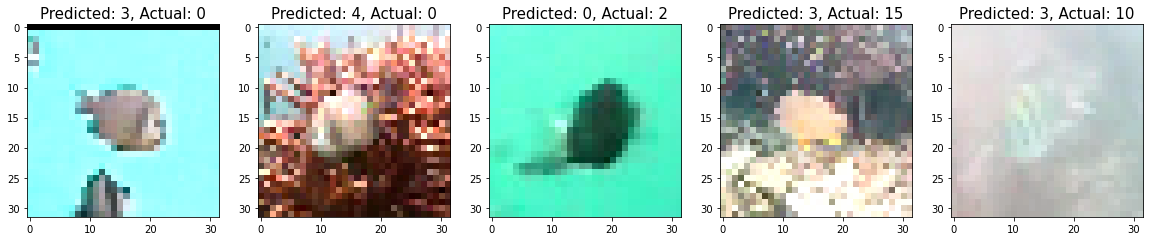

In [41]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test_reshaped[badIndex], (32,32,3)))
    plt.title('Predicted: {}, Actual: {}'.format(y_predict[badIndex], y_test[badIndex]), fontsize = 15)

# FIRST STEPS ML MODEL

### IMPORT LIBRARIES

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from random import sample

### SCALING FOR SVC

In [10]:
mmscaler = MinMaxScaler()

In [11]:
mmscaler.fit(X_train_reshaped)

c:\users\dany\.venvs\lewagon\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_train_scaled = mmscaler.transform(X_train_reshaped)

In [16]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample  = train_test_split(X_train_scaled, y_train, test_size = 0.5 )

### TRAINING SVC MODEL

In [20]:
X_train_sample.shape, y_train_sample.shape

((9579, 3072), (9579,))

In [21]:
svc_model = SVC(kernel= 'rbf',verbose=True, gamma='scale')

In [23]:
svc_model.fit(X_train_sample, y_train_sample)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [24]:
svc_model.score(X_test_reshaped, y_test)

0.4518329070758738